In [1]:
%reset
from datetime import datetime, timedelta
from dateutil import tz
import rpnpy.librmn.all as rmn
from rotated_lat_lon import RotatedLatLon
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import colormapTropical
import time
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# from scipy.optimize import newton
%load_ext autoreload
%autoreload 1
%aimport rpn_functions
%aimport cross_section 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
datestr = '20190407'
hs = '18'

path  = '/snow2/lachapelle/Simulations/Mtl_FR_'+datestr+'_CMC/Samples/Mtl_FR_'+datestr+'_CMC_'+datestr[0:6]+'/'
# path = '/snow2/winger/Output/WPS/WPS_1km_P3_v03/Samples/WPS_1km_P3_v03_201701/'

filename_tot = list()
for i in np.arange(0,24):
#     filename3 = path+'dm2017012400_000000'+rpn_functions.hrstr(i)
#     filename2 = path+'dp2017012400_000000'+rpn_functions.hrstr(i)
#     filename1 = path+'pm2017012400_000000'+rpn_functions.hrstr(i)

    filename3 = path+'dm'+datestr+hs+'_20190408.'+rpn_functions.hrstr(i)+'h' 
    filename2 = path+'dp'+datestr+hs+'_20190408.'+rpn_functions.hrstr(i)+'h' 
    filename1 = path+'pm'+datestr+hs+'_20190408.'+rpn_functions.hrstr(i)+'h' 
    
    filename_tot.append([filename1,filename2,filename3])

# vec_m =[76696048,96695397,96879008,97211526,95554887,95647853,95758672,95872352,95976687,96064793,96134760,96191692,96246238,96304375,96366599,94473117,94480247,94487883,94496053,94504798,94514158,94524177,94534901,94546379,94558667,94571819,94585882,94600884,94616842,94633760,94651654,94670518,94690329,94711064,94732701,94755189,94778473,94802493,94827174,94852445,94878228,94904441,94931001,94957806,94984776,95011817,95038839,95065755,95092472,95118924,95145027,95170699,95195822,95220131,95243327,95265178,95285523,95304252,95321305,95336683,95350439,95361878,95369337]
# vec_m_gz = [96637232,96695397,96773672,96879008,97020762,97211526,97468242,95554887,95601376,95647853,95706266,95758672,95820686,95872352,95930686,95976687,96026836,96064793,96105126,96134760,96165676,96191692,96218616,96246238,96274816,96304375,96334956,96366599,96399336,94473117,94476620,94480247,94484000,94487883,94491900,94496053,94500350,94504798,94509400,94514158,94519080,94524177,94529450,94534901,94540540,94546379,94552420,94558667,94565130,94571819,94578740,94585882,94593270,94600884,94608760,94616842,94625200,94633760,94642610,94651654,94661000,94670518,94680350,94690329,94700630,94711064,94721830,94732701,94743910,94755189,94766810,94778473,94790480,94802493,94814850,94827174,94839840,94852445,94865390,94878228,94891400,94904441,94917810,94931001,94944510,94957806,94971410,94984776,94998440,95011817,95025480,95038839,95052470,95065755,95079300,95092472,95105890,95118924,95132190,95145027,95158080,95170699,95183520,95195822,95208310,95220131,95232120,95243327,95254680,95265178,95275800,95285523,95295350,95304252,95313240,95321305,95329440,95336683,95343980,95350439,95356940,95361878,95366840,95369337]

# croping_list=[50,500,100,600] #2017
croping_list = [380,900,290,730] # 2019


{}
(286.42498779296875, 45.5, 16.424999237060547, 0.0)


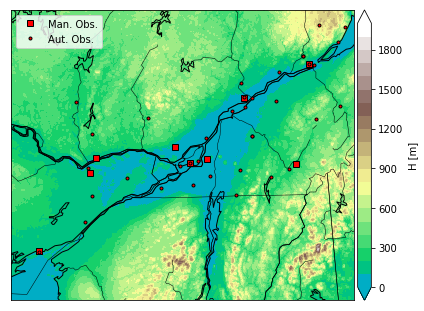

In [22]:
obs_p          = pd.read_csv('Obs/20190223_Ec_Obs', index_col=0)
station_info_p = pd.read_csv('Obs/StationInfo_Hourly20190223', index_col=0)

obs_T        = pd.read_csv('Obs/20190223_Ec_Temp', index_col=0)
station_info_T = pd.read_csv('Obs/StationInfo_HourlyTemp20190223', index_col=0)

# pnt_A = [360 -73.600730,47.213887]  #Mont Tremblant
# pnt_B = [360 -73.600730,44.383641] #Littleton

# pnt_A = [360 -76.538066,47.213887]  #Pythonga
# pnt_B = [360-71.821394,44.383641] #Littleton

# pnt_A = [360-76.687725,  45.468180] #Renfrew (Ottawa)
# pnt_B = [360-70.975607,  45.403610] #Mont Mégantic

[lon_s0,lon_s1,lat_s0,lat_s1]  = croping_list
fid2  = rmn.fstopenall(filename3, rmn.FST_RO)
rect_gz = rmn.fstlir(fid2, nomvar='GZ', ip1=95369337)
rect_gz_terrain = rect_gz['d'][lon_s0:lon_s1,lat_s0:lat_s1]
m, lon, lat = rpn_functions.m_from_tic(fid2, rect_gz, croping_list)
rmn.fstcloseall(fid2)
import matplotlib.colors as colors

fig,ax = plt.subplots(figsize= [6,6])
xx,yy = m(lon,lat)

m.drawcoastlines(color='k')
m.drawcountries(color='k')
m.drawrivers(color='k')
m.drawstates(color='k')

# sca = m.drawmapscale(-73,44,-73,44, 2*1.2467,fontsize = 14, barstyle='fancy',units='m')

# sca2 = m.drawmapscale(-73,44,-73,44, 2*1.2467,fontsize = 14,units='m')
sca[11] = plt.Text(179.167,-1.61705,'0'),
sca[12] = plt.Text(180.414,-1.61705,'100'),
sca[13] = plt.Text(181.66,-1.61705,'200'),
sca[14] = plt.Text(180.414,-1.4195,'km')
# m.drawmapscale()

bounds = np.linspace(0,2000,21)
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('terrain')
new_cmap = truncate_colormap(cmap, 0.19, 1)

cst = m.contourf(xx,yy, rect_gz_terrain*10, bounds, norm=norm, cmap=new_cmap,extend="both")


xxC =np.zeros(len(station_info_p.index))
yyC =np.zeros(len(station_info_p.index))
for i in range(len(station_info_p.index)):        
    xxC[i], yyC[i] = m(float(station_info_p.iloc[i].longitude)+360, float(station_info_p.iloc[i].latitude) )
    m.plot(xxC[i],yyC[i],'sk',markerfacecolor='r')
m.plot(xxC[i],yyC[i],'sk',markerfacecolor='r',label='Man. Obs.')

xxC =np.zeros(len(station_info_T.index))
yyC =np.zeros(len(station_info_T.index))
for i in range(len(station_info_T.index)):        
    xxC[i], yyC[i] = m(float(station_info_T.iloc[i].longitude)+360, float(station_info_T.iloc[i].latitude) )
    m.plot(xxC[i],yyC[i],'.k',markerfacecolor='r')
    
m.plot(xxC[i],yyC[i],'.k',markerfacecolor='r',label='Aut. Obs.')    

plt.legend()

# plt.plot(x_arr, y_arr,'k', linewidth=2)
# for i in range( int(np.ceil(dist_arr[-1]/100)) ):
#     m.plot(x_arr[ dist_arr<=i*100 ][-1], y_arr[ dist_arr<=i*100 ][-1], 'ok')
#     if np.mod(i,2)==0:
#         plt.text(x_arr[dist_arr<=i*100 ][-1], y_arr[ dist_arr<=i*100 ][-1], s='    '+str(i*100)+' km',\
#              va='center',  ha='left',color='k', fontsize=12,fontweight='bold')

# for item in [fig, ax]:
#     item.patch.set_visible(False)


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
cb = plt.colorbar(cst, cax=cax)
cb.set_label('H [m]')

plt.tight_layout()
plt.savefig('Relief.png', format='png', bbox_to_anchor='tight',dpi=500, transparent=True)#'/HOME/lachapelle/Projects/Event20170124/Figures/cross_sec_east_west'+rpn_functions.hrstr(i)+'.png', format='png', Transparent = True,  bbox_inches='tight'  )
    



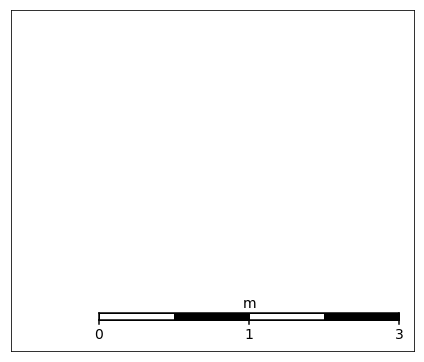

In [61]:
# pnt_A = [360 -73.600730,47.213887]  #Mont Tremblant
# pnt_B = [360 -73.600730,44.383641] #Littleton

# pnt_A = [360 -76.538066,47.213887]  #Pythonga
# pnt_B = [360-71.821394,44.383641] #Littleton

# pnt_A = [360-76.687725,  45.468180] #Renfrew (Ottawa)
# pnt_B = [360-70.975607,  45.403610] #Mont Mégantic

# [lon_s0,lon_s1,lat_s0,lat_s1]  = croping_list
# fid2  = rmn.fstopenall(filename3, rmn.FST_RO)
# rect_gz = rmn.fstlir(fid2, nomvar='GZ', ip1=95369337)
# rect_gz_terrain = rect_gz['d'][lon_s0:lon_s1,lat_s0:lat_s1]
# m, lon, lat = rpn_functions.m_from_tic(fid2, rect_gz, croping_list)
# rmn.fstcloseall(fid2)
# import matplotlib.colors as colors

fig,ax = plt.subplots(figsize= [6,6])
xx,yy = m(lon,lat)

# m.drawcoastlines(color='k')
# m.drawcountries(color='k')
# m.drawrivers(color='k')
# m.drawstates(color='k')

# sca = m.drawmapscale(-73,44,-73,44, 2*1.2467,fontsize = 14, barstyle='fancy',units='m')
sca = m.drawmapscale(np.mean(lon)+0.6,44,np.mean(lon),44, 4/1.15,fontsize = 14, barstyle='fancy',units='m')
sca[11] = plt.Text(179.167,-1.61705,'0'),
sca[12] = plt.Text(180.414,-1.61705,'100'),
sca[13] = plt.Text(181.66,-1.61705,'200'),
sca[14] = plt.Text(180.414,-1.4195,'km')
# m.drawmapscale()

bounds = np.linspace(0,2000,21)
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('terrain')
new_cmap = truncate_colormap(cmap, 0.19, 1)

# cst = m.contourf(xx,yy, rect_gz_terrain*10, bounds, norm=norm, cmap=new_cmap,extend="both")
# plt.plot(x_arr, y_arr,'k', linewidth=2)
# for i in range( int(np.ceil(dist_arr[-1]/100)) ):
#     m.plot(x_arr[ dist_arr<=i*100 ][-1], y_arr[ dist_arr<=i*100 ][-1], 'ok')
#     if np.mod(i,2)==0:
#         plt.text(x_arr[dist_arr<=i*100 ][-1], y_arr[ dist_arr<=i*100 ][-1], s='    '+str(i*100)+' km',\
#              va='center',  ha='left',color='k', fontsize=12,fontweight='bold')

# for item in [fig, ax]:
#     item.patch.set_visible(False)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="4%", pad=0.05)

# cb = plt.colorbar(cst, cax=cax)
# cb.set_label('H [m]')

plt.tight_layout()
plt.savefig('Scale.png', format='png', bbox_to_anchor='tight',dpi=500, transparent=True)#'/HOME/lachapelle/Projects/Event20170124/Figures/cross_sec_east_west'+rpn_functions.hrstr(i)+'.png', format='png', Transparent = True,  bbox_inches='tight'  )
    


{}
(286.42498779296875, 45.5, 16.424999237060547, 0.0)


/HOME/lachapelle/.local/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/HOME/lachapelle/.local/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
cross_section.py:409: RuntimeWarning: invalid value encountered in less
  Ice[Ice<0.02] = None
cross_section.py:410: RuntimeWarning: invalid value encountered in less
  Liq[Liq<0.02] = None


{}
(286.42498779296875, 45.5, 16.424999237060547, 0.0)


KeyboardInterrupt: 

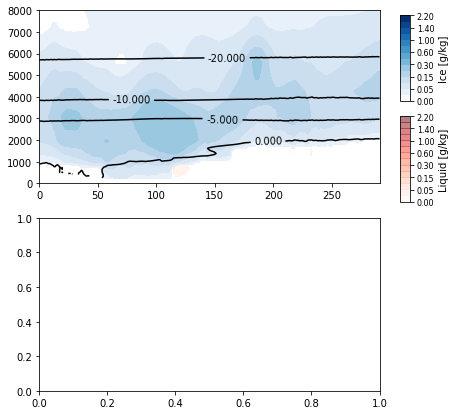

In [48]:
# pnt_A = [360 -73.600730,47.213887]  #Mont Tremblant
# pnt_B = [360 -73.600730,44.383641] #Littleton

# pnt_A = [360 -76.538066,47.213887]  #Pythonga
# pnt_B = [360-71.821394,44.383641] #Littleton

pnt_A = [360-76.687725,  45.468180] #Renfrew (Ottawa)
pnt_B = [360-70.975607,  45.403610] #Mont Mégantic

pnt_A = [360 - 74.594813,46.124836]  #Mont Tremblant
pnt_B = [360 - 71.821394, 44.383641] #Littleton

n_heights=100
n_cross=300
n_heightsU = 4
n_crossU  = 10
height_minU = 100
height_maxU = 750
height_max  = 800
# 'I1BM': rime ice volume mr [m3/kg] 
# 'I1NT': number ice mr [#/kg]
# 'I1QM': rime ice mass mr [kg/kg]
# 'I1QT': deposition ice mr [kg/kg]
# 'MPNC': Cloud number mr [#/kg]
# 'MPNR': Rain number mr [#/kg]
# 'MPQC': Cloud mass mr [kg/kg]
# 'MPQR': Rain mass mr [kg/kg]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[7,7])

x_arr, y_arr, dist_arr, ax1 = cross_section.plot_ice_content(filename_tot[2],pnt_A,pnt_B,\
croping_list, n_heights,n_cross,n_heightsU,n_crossU,height_minU,\
height_maxU, height_max,fig, ax[0])
        
# fig,ax=plt.subplots(2)
# for i in np.arange(1,2):
#     prec_cross, x_arr, y_arr, dist_arr = cross_section.plot_cross_section_type(filename_tot[i], pnt_A, pnt_B, croping_list,n_cross )    

#     plt.savefig('/HOME/lachapelle/Projects/Event20170124/Figures/cross_sec_east_west'+rpn_functions.hrstr(i)+'.png', format='png', Transparent = True,  bbox_inches='tight'  )
    

In [30]:
datestr='20170124'
obs_q = pd.read_csv('/HOME/lachapelle/Projects/Event20170124/Obs/'+datestr+'_Ec_Daily', index_col=0)
station_info_q = pd.read_csv('/HOME/lachapelle/Projects/Event20170124/Obs/StationInfo_Daily'+datestr, index_col=0)

In [61]:
obs_type, sim_type, obs_quot, sim_quot, obs_other, sim_other = rpn_functions.load_compa()




[Text(0,0,'2017-01-24'),
 Text(0,0,'2019-02-03'),
 Text(0,0,'2019-02-24'),
 Text(0,0,'2019-04-07')]

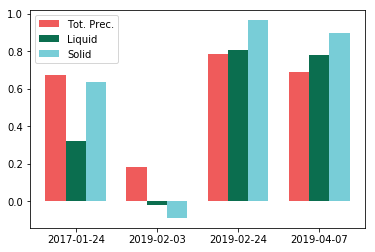

In [3]:
coeff_tot = np.zeros(4)
coeff_rn = np.zeros(4)
coeff_sn = np.zeros(4)
for i in range(4):
    coeff_tot[i] = rpn_functions.corr_coef_sim( sim_quot[i][0,:,:],obs_quot[i][0,:,:] )
    coeff_rn[i] = rpn_functions.corr_coef_sim( sim_quot[i][1,:,:],obs_quot[i][1,:,:] )
    coeff_sn[i] = rpn_functions.corr_coef_sim( sim_quot[i][2,:,:],obs_quot[i][2,:,:] )

fig, ax = plt.subplots(1)
ind = np.arange(4)
width = 0.25
ax.bar(ind-width,coeff_tot, color='#EF5B5B', width=width, label= 'Tot. Prec.')
ax.bar(ind,coeff_rn, color='#0B6E4F',width=width, label= 'Liquid')
ax.bar(ind+width,coeff_sn, color='#78CDD7',width=width, label= 'Solid')

ax.legend()
ax.set_xticks(range(4))
ax.set_xticklabels(['2017-01-24','2019-02-03','2019-02-24','2019-04-07'])
    

In [7]:
erreur_relatives = list()
err_rel_type     = list()
pourcent_good_type     = list()
for i in range(4):
    obs_quot_noNan = obs_quot[i][(~np.isnan(obs_quot[i]))  ].ravel()
    sim_quot_noNan  = sim_quot[i][(~np.isnan(obs_quot[i])) ].ravel()
    obs_quot_noNan = obs_quot_noNan[ (np.nonzero(obs_quot_noNan))]
    sim_quot_noNan = sim_quot_noNan[ (np.nonzero(obs_quot_noNan))]
    erreur_relatives.append( \
    np.sum(np.abs(obs_quot_noNan-sim_quot_noNan) ))
    
#     erreur_relatives[i] /= len(sim_quot_noNan)
    erreur_relatives[i] /= np.sum(obs_quot_noNan)
    
    err_rel_type.append(float( np.sum( np.logical_xor(obs_type[i].ravel(),sim_type[i].ravel() ))))    
    err_rel_type[i] /= len(obs_type[i].ravel())
    

    
print erreur_relatives
print err_rel_type

[1.0254331038493962, 0.8573576250373266, 1.040452319485342, 0.5796264471986603]
[0.1659056316590563, 0.16923076923076924, 0.10455840455840455, 0.15037037037037038]


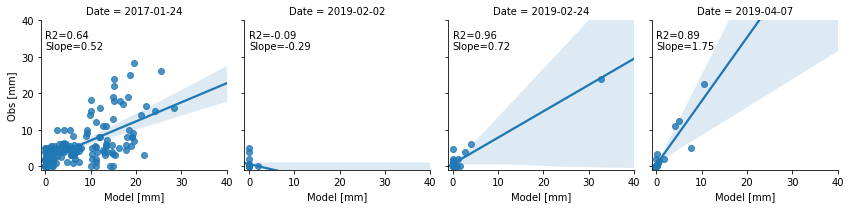

In [24]:
typ = 2
dfsim0 = pd.DataFrame( {'Model': sim_quot[0][typ,:,:].ravel(), 'Obs':obs_quot[0][typ,:,:].ravel()})
dfsim1 = pd.DataFrame( {'Model': sim_quot[1][typ,:,:].ravel(), 'Obs':obs_quot[1][typ,:,:].ravel()})
dfsim2 = pd.DataFrame( {'Model': sim_quot[2][typ,:,:].ravel(), 'Obs':obs_quot[2][typ,:,:].ravel()})
dfsim3 = pd.DataFrame( {'Model': sim_quot[3][typ,:,:].ravel(), 'Obs':obs_quot[3][typ,:,:].ravel()})


concatenated = pd.concat([dfsim0.assign(Date='2017-01-24'), dfsim1.assign(Date='2019-02-02'),\
                          dfsim2.assign(Date='2019-02-24'), dfsim3.assign(Date='2019-04-07')])

r2 = np.array([rpn_functions.corr_coef_sim(dfsim0.Model,dfsim0.Obs),rpn_functions.corr_coef_sim(dfsim1.Model,dfsim1.Obs),\
      rpn_functions.corr_coef_sim(dfsim2.Model,dfsim2.Obs),rpn_functions.corr_coef_sim(dfsim3.Model,dfsim3.Obs)])

lm = sns.lmplot(x='Model',y='Obs', data=concatenated,  col='Date', height=3, aspect=1)
axes = lm.axes

axes[0,0].set_ylim(-1,40)
axes[0,0].set_xlim(-1,40)

axes[0,0].set_ylabel('Obs [mm]')
axes[0,0].set_xlabel('Model [mm]')
axes[0,1].set_xlabel('Model [mm]')
axes[0,2].set_xlabel('Model [mm]')
axes[0,3].set_xlabel('Model [mm]')

axes[0,0].text(0,35, 'R2={0:.2f}'.format(r2[0,0]),fontsize=10)
axes[0,1].text(0,35, 'R2={0:.2f}'.format(r2[1,0]),fontsize=10)
axes[0,2].text(0,35, 'R2={0:.2f}'.format(r2[2,0]),fontsize=10)
axes[0,3].text(0,35, 'R2={0:.2f}'.format(r2[3,0]),fontsize=10)

axes[0,0].text(0,32, 'Slope={0:.2f}'.format(r2[0,1]),fontsize=10)
axes[0,1].text(0,32, 'Slope={0:.2f}'.format(r2[1,1]),fontsize=10)
axes[0,2].text(0,32, 'Slope={0:.2f}'.format(r2[2,1]),fontsize=10)
axes[0,3].text(0,32, 'Slope={0:.2f}'.format(r2[3,1]),fontsize=10)

plt.savefig('AccSnowStats.pdf', format='pdf',  Transparent = True,  bbox_inches='tight' )



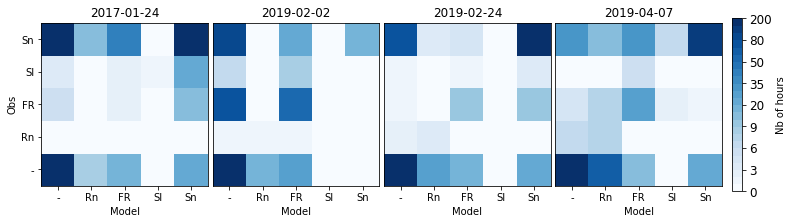

In [136]:

# event_nb = 0
# dfsim0 = pd.DataFrame( {'Model':   sim_type[event_nb][1,:,:].ravel(), 'Obs':obs_type[event_nb][1,:,:].ravel()})
# dfsim1 = pd.DataFrame( {'Model': 2*sim_type[event_nb][2,:,:].ravel(), 'Obs':obs_type[event_nb][2,:,:].ravel()})
# dfsim2 = pd.DataFrame( {'Model': 3*sim_type[event_nb][3,:,:].ravel(), 'Obs':obs_type[event_nb][3,:,:].ravel()})
# dfsim3 = pd.DataFrame( {'Model': 4*sim_type[event_nb][4,:,:].ravel(), 'Obs':obs_type[event_nb][4,:,:].ravel()})
Date_label = ['2017-01-24','2019-02-02', '2019-02-24','2019-04-07']
fig,ax = plt.subplots(1,4,figsize=(14,3))
df_simobs = list()
nb_per_bin  = list()
for event_nb in range(4):
    sim_type[event_nb][3,:,:][(sim_type[event_nb][3,:,:]==True) &
                             ((sim_type[event_nb][1,:,:]==True) |
                              (sim_type[event_nb][2,:,:]==True) |
                              (sim_type[event_nb][4,:,:]==True))]  = False

    sim_type[event_nb][4,:,:][(sim_type[event_nb][4,:,:]==True) &
                             ((sim_type[event_nb][1,:,:]==True) |
                              (sim_type[event_nb][2,:,:]==True))] = False

    sim_type[event_nb][1,:,:][(sim_type[event_nb][1,:,:]==True) &
                              (sim_type[event_nb][2,:,:]==True) ] = False

    sim_type_pl =   1*sim_type[event_nb][3,:,:] + 2*sim_type[event_nb][1,:,:] \
                  + 3*sim_type[event_nb][2,:,:] + 4*sim_type[event_nb][4,:,:]

    
    obs_type[event_nb][3,:,:][(obs_type[event_nb][3,:,:]==True) &
                             ((obs_type[event_nb][1,:,:]==True) |
                              (obs_type[event_nb][2,:,:]==True) |
                              (obs_type[event_nb][4,:,:]==True))]  = False

    obs_type[event_nb][4,:,:][(obs_type[event_nb][4,:,:]==True) &
                              (obs_type[event_nb][1,:,:]==True) |
                              (obs_type[event_nb][2,:,:]==True) ] = False

    obs_type[event_nb][1,:,:][(obs_type[event_nb][1,:,:]==True) &
                              (obs_type[event_nb][2,:,:]==True) ] = False

    obs_type_pl =    1*obs_type[event_nb][3,:,:] + 2*obs_type[event_nb][1,:,:] \
                  +  3*obs_type[event_nb][2,:,:] + 4*obs_type[event_nb][4,:,:]
    
    
    df_simobs.append( pd.DataFrame( {'Model': sim_type_pl.ravel(), 'Obs' : obs_type_pl.ravel()}) )
    
    nb_per_bin_i = np.zeros([5,5])
    for ii in range(5):
        for jj in range(5):
            nb_per_bin_i[ii,jj] = np.sum( np.ones(len(sim_type_pl.ravel()))[(sim_type_pl.ravel()==jj) & (obs_type_pl.ravel()==ii) ]  )
    
    nb_per_bin.append(nb_per_bin_i)
    
    bounds = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,200]#np.linspace(0,200,21)
    norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)    

    xx1, yy2 = np.meshgrid(range(6),range(6)) 
    csT = ax[event_nb].pcolormesh( xx1, yy2,nb_per_bin_i,norm=norm, cmap='Blues')
    ax[event_nb].set_yticks([])
    ax[event_nb].set_xticks([0.5,1.5,2.5,3.5,4.5])
    ax[event_nb].set_xticklabels(['-','Rn','FR','Sl','Sn'])
    ax[event_nb].set_xlabel('Model')
    ax[event_nb].set_title(Date_label[event_nb])

ax[0].set_yticks([0.5,1.5,2.5,3.5,4.5])
ax[0].set_yticklabels(['-','Rn','FR','Sl','Sn'])
ax[0].set_ylabel('Obs')

left_cm = 0.81
label_colormap = 'Nb of hours'
fig.subplots_adjust(right=0.8)
cbar_ax3 = fig.add_axes([left_cm, 0.1, 0.01, 0.8]) #[left, bottom, width, height] 
cbZe=fig.colorbar(csT, cax=cbar_ax3)
cbZe.set_label(label_colormap)
cbZe.ax.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.03)



Text(0.5,6.8,'Model')

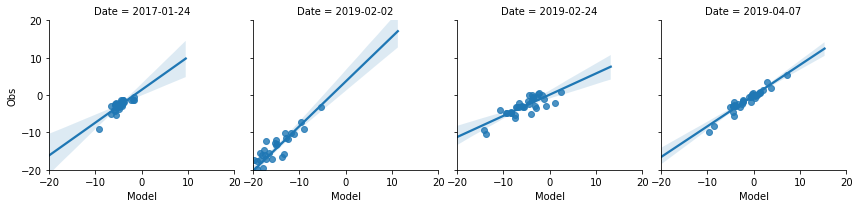

In [66]:

typ = 0
date = 15
dfsim0 = pd.DataFrame( {'Model': sim_other[0][typ,:,date].ravel(), 'Obs':obs_other[0][typ,:,date].ravel()})
dfsim1 = pd.DataFrame( {'Model': sim_other[1][typ,:,date].ravel(), 'Obs':obs_other[1][typ,:,date].ravel()})
dfsim2 = pd.DataFrame( {'Model': sim_other[2][typ,:,date].ravel(), 'Obs':obs_other[2][typ,:,date].ravel()})
dfsim3 = pd.DataFrame( {'Model': sim_other[3][typ,:,date].ravel(), 'Obs':obs_other[3][typ,:,date].ravel()})

concatenated = pd.concat([dfsim0.assign(Date='2017-01-24'), dfsim1.assign(Date='2019-02-02'),\
                          dfsim2.assign(Date='2019-02-24'), dfsim3.assign(Date='2019-04-07')])

r2 = np.array([rpn_functions.corr_coef_sim(dfsim0.Model,dfsim0.Obs),rpn_functions.corr_coef_sim(dfsim1.Model,dfsim1.Obs),\
      rpn_functions.corr_coef_sim(dfsim2.Model,dfsim2.Obs),rpn_functions.corr_coef_sim(dfsim3.Model,dfsim3.Obs)])

lm = sns.lmplot(x='Model',y='Obs', data=concatenated,  col='Date', height=3, aspect=1)
axes = lm.axes

# axes[0,0].set_ylim(980,1030)
# axes[0,0].set_xlim(980,1030)

# axes[0,0].set_ylim(50,100)
# axes[0,0].set_xlim(50,100)

axes[0,0].set_ylim(-20,20)
axes[0,0].set_xlim(-20,20)

axes[0,0].set_ylabel('Obs')
axes[0,0].set_xlabel('Model')
axes[0,1].set_xlabel('Model')
axes[0,2].set_xlabel('Model')
axes[0,3].set_xlabel('Model')

# axes[0,0].text(0,35, 'R2={0:.2f}'.format(r2[0,0]),fontsize=10)
# axes[0,1].text(0,35, 'R2={0:.2f}'.format(r2[1,0]),fontsize=10)
# axes[0,2].text(0,35, 'R2={0:.2f}'.format(r2[2,0]),fontsize=10)
# axes[0,3].text(0,35, 'R2={0:.2f}'.format(r2[3,0]),fontsize=10)

# axes[0,0].text(0,32, 'Slope={0:.2f}'.format(r2[0,1]),fontsize=10)
# axes[0,1].text(0,32, 'Slope={0:.2f}'.format(r2[1,1]),fontsize=10)
# axes[0,2].text(0,32, 'Slope={0:.2f}'.format(r2[2,1]),fontsize=10)
# axes[0,3].text(0,32, 'Slope={0:.2f}'.format(r2[3,1]),fontsize=10)

# plt.savefig('HumStats.pdf', format='pdf',  Transparent = True,  bbox_inches='tight' )



In [29]:
sim_other[0] == sim_other[1]

/snow2/lachapelle/.local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [63]:
sim_other[2][1,10,:]

array([73.82526636, 75.96458924, 76.76717333, 76.53815993, 82.16190888,
       81.70167101, 79.82868402, 83.92952649, 81.58413831, 81.97321287,
       76.10024542, 80.44880278, 81.70634309, 81.7690934 , 81.36508334,
       82.40774236, 83.70782548, 84.74839547, 91.8576103 , 93.98001245,
       94.71179414, 95.31754752, 96.02353204, 95.69666829, 96.36739836,
       97.14655644, 97.73924848, 96.33212622, 98.36928307, 98.74845339,
       98.97744143, 99.36462127, 99.77139651, 90.38220123, 91.69355323,
       92.11411569, 90.91682231, 89.49393647, 87.97595903, 85.79130678,
       85.94834984, 86.81086731, 90.71038163, 94.01558042, 93.20365375,
       87.07699863, 72.1733554 , 72.79867765, 71.4991462 , 76.42433025,
       70.63362435, 69.81737817, 68.90869294, 67.33737865, 67.41140767,
       68.75481749, 68.94783814, 69.81910138, 71.75534077, 72.44346736,
       71.06471448, 69.02281904, 66.19179518, 64.48689498, 63.8497554 ,
       63.76683887, 63.92821898, 62.76789632, 60.06574654, 59.07

In [62]:
obs_other[0][1,10,:]

array([ 76.,  76.,  77.,  77.,  78.,  76.,  76.,  76.,  76.,  77.,  77.,
        77.,  73.,  70.,  70.,  76.,  87.,  88.,  91.,  90.,  92.,  94.,
        92.,  93.,  93.,  93.,  97.,  96.,  98.,  99., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100.,  99., 100.,  99.,
        98.,  98., 100.,  99.,  97.,  95.,  96.,  96.,  96.,  96.,  98.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        97.,  95.,  94.,  86.,  84.,  84.,  79.])

Help on method drawmapscale in module mpl_toolkits.basemap:

drawmapscale(self, lon, lat, lon0, lat0, length, barstyle='simple', units='km', fontsize=9, yoffset=None, labelstyle='simple', fontcolor='k', fillcolor1='w', fillcolor2='k', ax=None, format='%d', zorder=None, linecolor=None, linewidth=None) method of mpl_toolkits.basemap.Basemap instance
    Draw a map scale at ``lon,lat`` of length ``length``
    representing distance in the map
    projection coordinates at ``lon0,lat0``.
    
    .. tabularcolumns:: |l|L|
    
    ==============   ====================================================
    Keywords         Description
    ==============   ====================================================
    units            the units of the length argument (Default km).
    barstyle         ``simple`` or ``fancy`` (roughly corresponding
                     to the styles provided by Generic Mapping Tools).
                     Default ``simple``.
    fontsize         for map scale annotat

 Text(179.167,-1.61705,'0'),
 Text(180.414,-1.61705,'1'),
 Text(181.66,-1.61705,'2'),
 Text(180.414,-1.4195,'m')]

In [125]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or file-like object
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember 

In [51]:
print(np.min(lon))
print(np.max(lon))

dist = np.cos(np.max(lat)/360*2*np.pi)*np.pi*12742/360 * (np.max(lon)-np.min(lon))
print(dist)

282.64316
289.55505
518.7223714101135


In [26]:
print(np.min(xx))
print(np.max(xx))

177.44399128195417
182.1150093790972


In [35]:
np.cos(np.min(lat)/360*2*np.pi)*12742/360

25.655116071019155

In [45]:
np.mean(lat)

45.559834